# Problema de la mochila


Dado un conjunto de $m$ elementos cada uno descrito por su masa $w_j$ y su valor $v_j$ y una mochila cuyo límite de capacidad es $C$. Asumiendo que el volumen y la forma de los objetos no importan, encuentre el subconjunto de objetos de mayor valor que puede ser llevado en la mochila. Este es un problema de optimización combinatorial NP completo

Podemos definir la variable indicadora

$$
x = (z_1, z_2, \ldots, z_m)
$$

donde cada $z_i \in \{0, 1\}$ es igual a 1 si el elemento $i$ está en la mochila y 0 si no lo está

Se define entonces un espacio de posibilidades

$$
\Omega = \left \{x \in {0, 1}^m : \sum_{j=1}^m w_j z_j \leq C \right \}
$$

De donde queremos encontrar aquella que maximiza la utilidad

$$
U(x) = \sum_{j=1}^m v_j z_j
$$

## Solución con Monte Carlo

Para resolverlo con Monte Carlo podríamos

- Dado $x_t$
- Escoger $j \in [1, ..., m]$ al azar de manera uniforme
- Crear $y=(z_1, z_2, ..., 1-z_j,..., z_m)$, si es la mejor solución hasta ahora, guardarla
- Si $y$ es factible entonces $x_{t+1} = y$ de lo contrario $x_{t+1} = x_t$

Pero esto podría tardar muchisimo para $m$ grande

## Actividad: Simulated Annealing

Resuelva este problema usando el algoritmo de Simulated Annealing, el cual es una versión del algoritmo de Metropolis donde la distribución de interés se formula a partir de la función de utilidad como

$$
p(x) = \frac{1}{Z} \exp \left(\frac{U(x)}{T} \right) 
$$

donde $T$ es la temperatura y $Z = \sum_{x\in \Omega}  \exp \left(\frac{U(x)}{T} \right)$ es la evidencia que no depende de $x$

- Implemente la solución de Monte Carlo con el criterio de aceptación ingenuo 
- Implemente la solución de Simulated annealing modificando el criterio de aceptación ingenuo por de Metropolis
- Para el conjunto de datos $X_3$
    - Muestre las trazas y compare SA con el método de montecarlo clásico ¿Cuánto demora cada uno en llegar a la solución óptima?
    - Explore la influencia del parámetro $T$. Muestre y compare resultados con un $T$ grande, adecuado y pequeño decididos por usted. Pruebe con un valor de $T$ adaptivo dado por
    $$
    T_i = \frac{\alpha}{\log(i)}
    $$
    donde $\alpha$ es una constante positiva seleccionada por usted (seleccione un conjunto de va
    - Muestre la mejor solución obtenida usando Montecarlo y SA (Mejor valor de $T$)

Nota: La solución óptima tiene un valor de 1458. Su resultado no necesariamente alcanzará esta solución pero acercarse.

In [1]:
X3 = {"m": 15, "C": 750,
      "v": [135, 139, 149, 150, 156, 163, 173, 184, 192, 201, 210, 214, 221, 229, 240],
      "w": [70, 73, 77, 149, 80, 82, 87, 90, 94, 98, 106, 110, 113, 115, 118]
     }

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from random import randint
import math

## **Solución Monte Carlo con criterio de aceptación ingenuo**

In [18]:
# Creamos una funcion para que el algoritmo cada vez elija un vector diferente de 1's y 0's de manera aleatoria
def vector_random(X):
    x= np.zeros(len(X["v"]))
    for i in range(np.random.randint(3, 15)):
        x[np.random.randint(len(X["v"]))] = 1
    return x

# Creamos el algoritmo de Monte Carlo
def monte_carlo(X):
    pesos = 0
    valor = 0
    peso_maximo = 0
    valor_maximo = 0
    mejor_vector = np.zeros(len(X["v"]))
    resultados = []
    y = vector_random(X)
    for i in range(1000000):
        k = randint(0,len(X3["v"])-1)
        y[k] = 1 - y[k]
        pesos = 0
        valor = 0
        for j in range(len(X["v"])):
            valor += X["v"][j]*y[j]
            pesos += X["w"][j]*y[j]
        if(pesos < X3["C"] and valor_maximo < valor):
            peso_maximo = pesos
            valor_maximo = valor
            resultados.append(valor)
        
    print("peso máximo: ", peso_maximo)
    print("valor máximo: ", valor_maximo)
    plt.plot(resultados)
    return;

peso máximo:  749.0
valor máximo:  1503.0
Wall time: 12.7 s


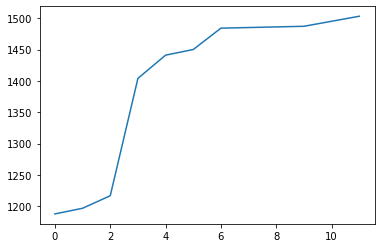

In [19]:
%%time
# Corremos y graficamos la traza de Monte Carlo
monte_carlo(X3)

## **Solución Simulated Annealing con modificación de criterio de aceptación ingenuo**

In [23]:
# Se define T para su uso en SA
def te(pos):
    a = 100
    return a/np.log(pos)
    

In [24]:
# Función P que calcula el criterio que se aplica en SA
def p(valor, valor2, T) : 
    return (np.exp(valor/T)/np.exp(valor2/T))

In [25]:
# Creamos el algoritmo de Simulated Annealing con el valor T adaptativo
def simulated_annealing_Tadaptativo():
    mix_time = 1000000
    us = scipy.stats.uniform.rvs(size=mix_time)
    valor = 0
    pesos = 0
    valor2 = 0
    x = np.zeros(15)
    y = np.zeros(15)
    resultados2 = []
    for n in range(1, mix_time):
        valor = 0
        pesos = 0
        valor2 = 0
        T = te(n)
        
        k = randint(0,len(X3["v"])-1)
        x[k] = 1 - x[k]
        
        for j in range(len(X3["v"])):
                valor += X3["v"][j]*x[j]
                valor2 += X3["v"][j]*y[j]
                pesos += X3["w"][j]*x[j]
        cociente = p(valor,valor2, T)
        if (pesos<X3["C"] and us[n] < min(1,cociente)):
            resultados2.append(valor)
            y = x.copy()
        else:
            x = vector_random(X3)
    print("Valor máximo", sum(y*X3["v"]))
    print("Peso máximo", sum(y*X3["w"]))
    print("Vector ", y)
    plt.plot(resultados2)
    
    return;

<ipython-input-23-dd5bcacd16d7>:4: RuntimeWarning: divide by zero encountered in double_scalars
  return a/np.log(pos)


Valor máximo 1480.0
Peso máximo 740.0
Vector  [1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0.]
Wall time: 51.1 s


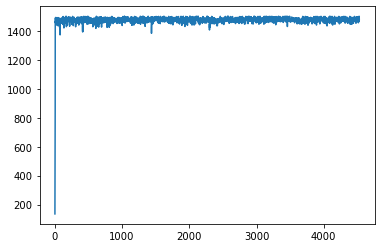

In [26]:
%%time
simulated_annealing_Tadaptativo()


## **Análisis**

- Si contamos la cantidad de iteraciones equivalentes a 1 millon para cada algoritmo, podemos observar que monte carlo demora aproximadamente 41 segundos, mientras que el algoritmo de simulated annealing con T dinámico demora aproximadamente 1 min 22s, lo que significa que demora aproximadamente el doble de tiempo.

## **Comparamos influencias de T**

In [27]:
# Creamos el algoritmo de Simulated Annealing para probar con distintos valores de T
def simulated_annealing_Tfijo (T):
    mix_time = 1000000
    us = scipy.stats.uniform.rvs(size=mix_time)
    valor = 0
    pesos = 0
    valor2 = 0
    x = np.zeros(15)
    y = np.zeros(15)
    resultados2 = []
    for n in range(1, mix_time):
        valor = 0
        pesos = 0
        valor2 = 0
        x = vector_random(X3)
        for j in range(len(X3["v"])):
                valor += X3["v"][j]*x[j]
                valor2 += X3["v"][j]*y[j]
                pesos += X3["w"][j]*x[j]
        cociente = p(valor,valor2, T)
        if (pesos<X3["C"] and us[n] < min(1,cociente)):
            resultados2.append(valor)
            y = x.copy()
        else:
            x = vector_random(X3)
    print("Valor máximo", sum(y*X3["v"]))
    print("Peso máximo", sum(y*X3["w"]))
    print("Vector ", y)
    plt.plot(resultados2)
    
    return;

<ipython-input-24-22e362458a38>:3: RuntimeWarning: overflow encountered in exp
  return (np.exp(valor/T)/np.exp(valor2/T))
<ipython-input-24-22e362458a38>:3: RuntimeWarning: invalid value encountered in double_scalars
  return (np.exp(valor/T)/np.exp(valor2/T))


Valor máximo 1020.0
Peso máximo 589.0
Vector  [1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.]
Wall time: 1min 5s


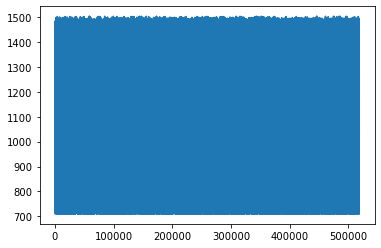

In [28]:
%%time
#Corremos y graficamos la traza de SA
T_chico = 1
T_medio = 10
T_grande = 100
simulated_annealing_Tfijo(T_chico)



Valor máximo 1502.0
Peso máximo 749.0
Vector  [1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1.]


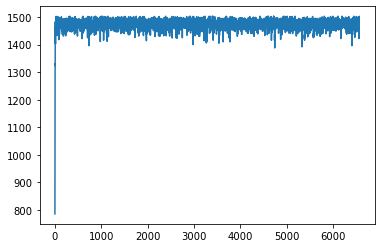

In [29]:
simulated_annealing_Tfijo(T_medio)

Valor máximo 1347.0
Peso máximo 681.0
Vector  [1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1.]


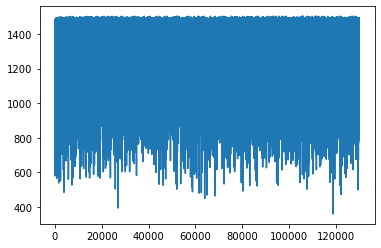

In [30]:
simulated_annealing_Tfijo(T_grande)

## **Análisis**

Podemos observar que con el parametro T fijo en 1, nuestro algoritmo acepta practicamente cualquier valor como nuevo óptimo y no tiene practicamente utilidad. Con el valor de T = 10, nos damos cuenta que tenemos un criterio muchisimo mas razonable, de hecho, tiene resultados parecidos al T adaptativo con valor de "a" fijo en 100. Por último podemos ver que cuando t es muy grande, como por ejemplo 100 o mas, el algoritmo discrimina con criterios muy mal implementados, y queda con la misma utilidad que con T = 1. Con esto podemos concluir que el parametro T es de vital importancia para el algoritmo, siendo fundamental investigar que valor, o valores de T son los que más se adecúan al problema que se quiere resolver.

## **Mejores soluciones**

Al comparar los dos algoritmos, nos damos cuenta que el algoritmo de Monte Carlo es evidentemente mas preciso, llegando siempre al valor máximo de 1503 y peso máximo de 749 cuando contamos con una cantidad de iteraciones que rondan el millón, lo cual demora aproximadamente 41 segundos. Por otro lado, el algoritmo de Simulated Annealing muestra resultados mas cambiantes en general, tomando como referencia el algoritmo con T adaptativo y un alfa fijo en 100, que es el que dio mejores resultados, pode mos ver que el valor óptimo reonda entre 1488 y 1501, haciendo un total de 10 pruebas con 1 millón de iteraciones cada una. Con esto, podemos concluir que si se conocen los datos necesarios para establecer todos los criterios de aceptación para el algoritmo, siempre sera mejor el algoritmo de monte carlo, sin embargo, en caso de no conocerse todos los datos necesarios, se puede aplicar simulated annealing como opción suficientemente aceptable, a costa de un costo computacional mayor y menos precisión.